## Importing Libraries

In [8]:
import torch
import pickle
import random
import numpy as np
from src.models.unet import UNet
from matplotlib import pyplot as plt

## Defining Helper Functions

In [9]:
def sig(x):
  return 1/(1 + np.exp(-x))

## Visualize Losses

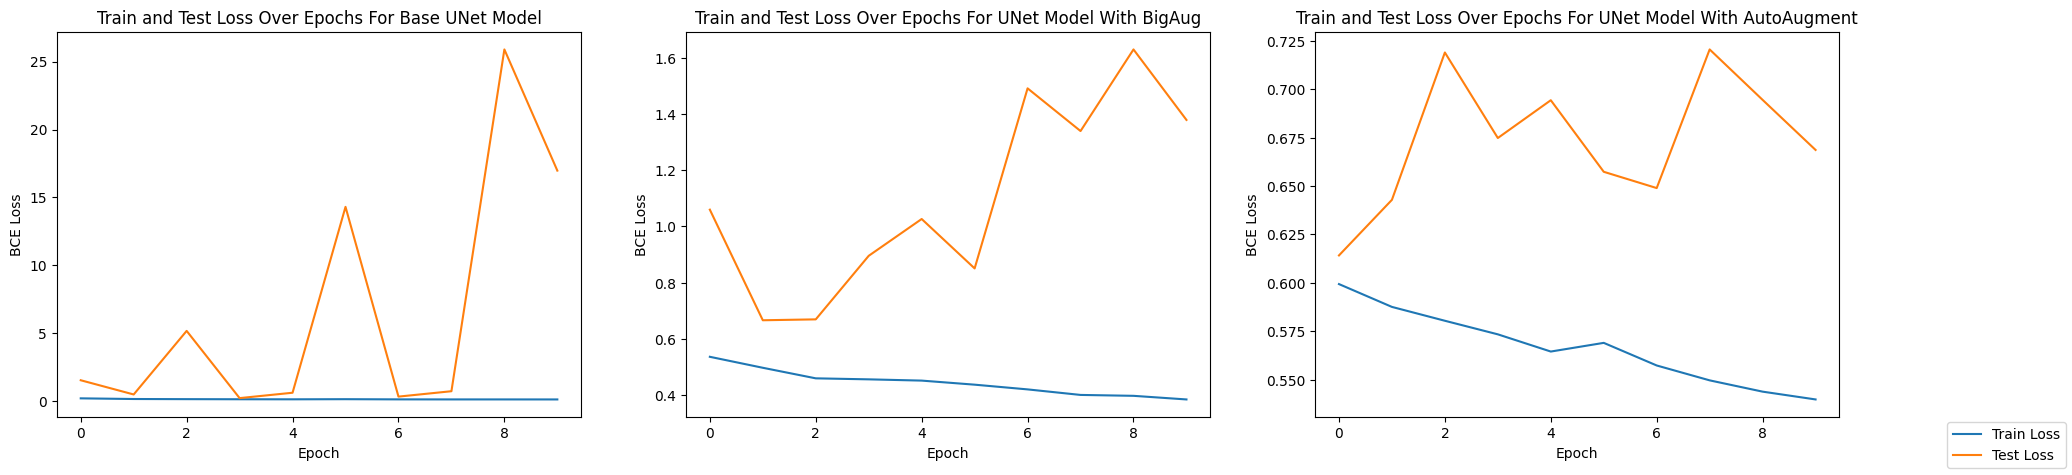

In [5]:
with open('../outputs/losses/losses_autoaugment.pkl', 'rb') as f:
    loss_autoaugment = pickle.load(f)

with open('../outputs/losses/losses_base.pkl', 'rb') as f:
    loss_base = pickle.load(f)

with open('../outputs/losses/losses_bigaug.pkl', 'rb') as f:
    loss_bigaug = pickle.load(f)

fig, axs = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(23)

axs[0].plot(loss_base['train_loss'], label="Train Loss")
axs[0].plot(loss_base['test_loss'], label="Test Loss")
axs[0].set_title("Train and Test Loss Over Epochs For Base UNet Model")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("BCE Loss")

axs[1].plot(loss_bigaug['train_loss'], label="Train Loss")
axs[1].plot(loss_bigaug['test_loss'], label="Test Loss")
axs[1].set_title("Train and Test Loss Over Epochs For UNet Model With BigAug")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("BCE Loss")

axs[2].plot(loss_autoaugment['train_loss'], label="Train Loss")
axs[2].plot(loss_autoaugment['test_loss'], label="Test Loss")
axs[2].set_title("Train and Test Loss Over Epochs For UNet Model With AutoAugment")
axs[2].set_xlabel("Epoch")
axs[2].set_ylabel("BCE Loss")

handles, labels = axs[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right')

## Visualize Segmentations

In [7]:
base_model = UNet(3, 1)
bigaug_model = UNet(3, 1)
autoaugment_model = UNet(3, 1)

base_model.load_state_dict(torch.load('outputs/models/unet_base_final.pt', map_location=torch.device('cpu'))) 
bigaug_model.load_state_dict(torch.load('outputs/models/unet_bigaug_final.pt', map_location=torch.device('cpu'))) 
autoaugment_model.load_state_dict(torch.load('outputs/models/unet_autoaug_final.pt', map_location=torch.device('cpu'))) 

<All keys matched successfully>

In [ ]:
samples = random.sample(range(1, len(test_dataset)), 1)

for i in samples:
    figure(figsize=(20, 8), dpi=80)

    image, mask = test_dataset[i]
    image_dis = image.cpu().permute(1, 2, 0)
    image = image.unsqueeze(0).float()

    # Original Image 
    plt.subplot(2, 4, 1)
    plt.title("Original Image")
    plt.imshow(image_dis)

    # Original Mask
    plt.subplot(2, 4, 5)
    plt.title("Ground Truth Mask")
    plt.imshow(mask.squeeze(0))

    # Base Model
    plt.subplot(2, 4, 2)
    plt.title("Base Model Segmentation")
    pred = base_model(image)
    pred_np = sig(pred[0][0].detach().numpy())
    plt.imshow(pred_np)

    # Base Binary
    plt.subplot(2, 4, 6)
    plt.title("Thresholded Base Model Segmentation")
    pred_binary = pred_np > 0.5
    plt.imshow(pred_binary)

    # BigAug Model
    plt.subplot(2, 4, 3)
    plt.title("BigAug Model Segmentation")
    pred = bigaug_model(image)
    pred_np = sig(pred[0][0].detach().numpy())
    plt.imshow(pred_np)

    # BigAug Binary
    plt.subplot(2, 4, 7)
    plt.title("Thresholded BigAug Model Segmentation")
    pred_binary = pred_np > 0.5
    plt.imshow(pred_binary)

    # AutoAugment Model
    plt.subplot(2, 4, 4)
    plt.title("AutoAug Model Segmentation")
    pred = autoaugment_model(image)
    pred_np = sig(pred[0][0].detach().numpy())
    plt.imshow(pred_np)

    # AutoAugment Binary
    plt.subplot(2, 4, 8)
    plt.title("Thresholded AutoAugment Model Segmentation")
    pred_binary = pred_np > 0.5
    plt.imshow(pred_binary)